# Overview of how the Model Works

The Perceptron Neuron model operates very similarly to a biological neuron, as illustrated below: 

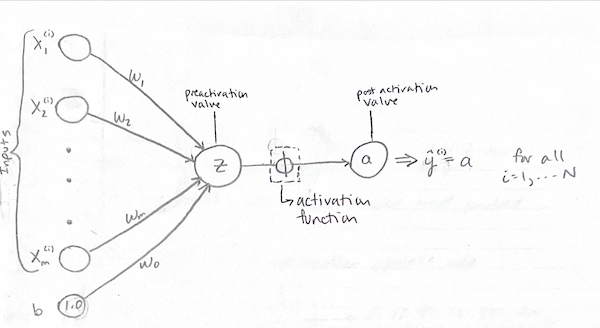


## Framework
Given our data $\mathscr{D} = (x^1, y^1), \ldots, (x^N, y^N)$ where each $y^i$ is either 1 or -1 and each $x^i$ is a 'feature' vector with $\mathscr{m}$ features, we can apply our perceptron model as follows:
- Compute weights $\bar{w} = [w_0, w_1, \ldots, w_m]$ and bias $\mathscr{b}$ using the Perceptron Update Rule (which we'll explain in detail soon)
- Compute preactivation value $\mathscr{z}_i = w_0 + w_1x_1^i + w_2x_2^i + \ldots + w_mx_m^i = \bar{w}^T \cdot \bar{x}(i)$ where $\bar{x}(i) = [1, x_1, x_2, \ldots, x_m]$
- Plug pre-activation value $\mathscr{z}$ into an activation function $\rho(z) = \begin{cases} 1, & \text{if } z > 0 \\ -1, & \text{if } z < 0 \end{cases}$ to compute a post activation value $\mathscr{a}$ which becomes our predicted $\hat{y}^i$

The basic premise is that, for a particular datapoint, we are trying to predict a particular binary characteristic of that datapoint given a set of features.


## Computing Weights
Going back to our overview of supervised learning, recall our hypothesis set $\mathscr{H}$ of all possible functions to fit our data that our Learning Algorithm $\mathscr{A}$ is choosing from. In this scenario, our hypothesis set is all possible combinations of weights and bias which together is represented by $\bar{w}$. Our loss function to evaluate a hypothesized perceptron model $\mathscr{g}$ is $
C(w, b) = \frac{1}{4} \sum_{i=1}^N (\hat{y}^{(i)} - y^{(i)})^2$, which represents the number of times our model $\mathscr{g}$ with weights $\mathscr{w}$ and bias $\mathscr{b}$ is wrong given our data. 

Our preliminary weights and bias is first computed from a uniform distribution, so our initial outputs are completely random. To improve our $\bar{w}$ and ultimately select the most optimal weights and bias, we must use the **Perceptron Update Rule**, which considers each case $y^{(i)}$ and $\hat{y}^{(i)}$ and updates the model weights according to the following formula:

$$
\bar{w}^* = \bar{w} - \frac{1}{2}(\hat{y}^{(i)} - y^{(i)})\bar{x}^{(i)}
$$

Let's go through each case and understand how this rule improves our model:

- recall the following 
    - $\bar{w}_t \cdot \bar{x}^{(i)} = \|\bar{w}\|\|\bar{x}\| \cos \theta$
    - $\hat{y}^{(i)} = a = \rho(\bar{w}^T \bar{x}^{(i)})$

Case 1: $y^{(i)} = 1$ and $\hat{y}^{(i)} = -1$

$$
\begin{align*}
\bar{w}^* &= \bar{w} - \frac{1}{2}(\hat{y}^{(i)} - y^{(i)})\bar{x}^{(i)} \\
          &= \bar{w} - \frac{1}{2}((-1) - 1)\bar{x}^{(i)} \\
          &= \bar{w} + \bar{x}^{(i)}
\end{align*}
$$

Below is a visual representation of what's happening:

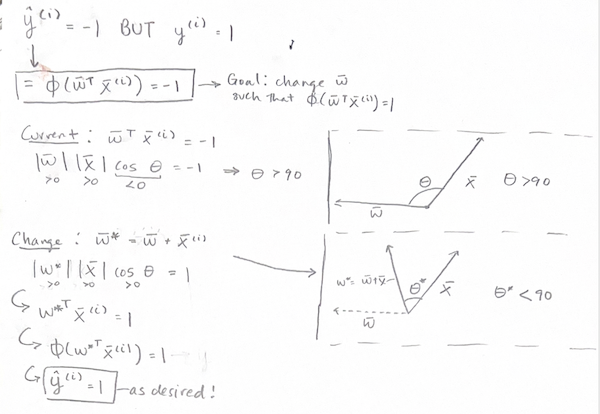

Case 2: $y^{(i)} = -1$ and $\hat{y}^{(i)} = 1$

$$
\begin{align*}
\bar{w}^* &= \bar{w} - \frac{1}{2}(\hat{y}^{(i)} - y^{(i)})\bar{x}^{(i)} \\
          &= \bar{w} - \frac{1}{2}(1 - (-1))\bar{x}^{(i)} \\
          &= \bar{w} - \bar{x}^{(i)}
\end{align*}
$$

Applying very similar logic, below is a visual representation of what's happening:

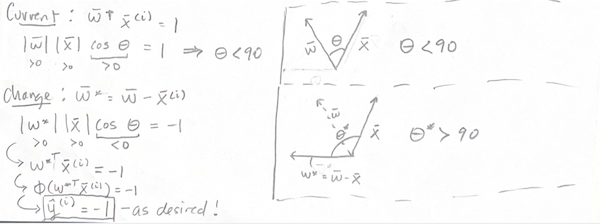

Case 3: $y^{(i)} = \hat{y}^{(i)}$

$$
\begin{align*}
\bar{w}^* &= \bar{w} - \frac{1}{2}(\hat{y}^{(i)} - y^{(i)})\bar{x}^{(i)} \\
          &= \bar{w} - \frac{1}{2}(0 - 0)\bar{x}^{(i)}\\
          &= \bar{w}
\end{align*}
$$

This result makes sense as there is no need to update our weights when we encounter a correct classification.

## Implementation

Implementing the perceptron model is quite simple and proceeds as follows:
- 1) feed given data into neuron model and predict $\hat{y}^{(i)}$ for each datapoint $\mathscr{i}$
    - 1.1) perform Perceptron Update Rule to compute $\mathscr{w}$ and $\mathscr{b}$
- 2) repeat step 1 until one of two things occur:
     - maximum epochs (the number of times you update the model) reached 
     - cost function is outputting very small errors

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# define Perceptron class
class Perceptron(object):
    def __init__(self, eta = .5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for epoch in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            print(f"epoch: {epoch}, errors: {errors}")
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [6]:
#read in the data
df = pd.read_csv("salary.csv")

median_salary = df['Salary'].median()

# Add the new column 'high salary' based on the condition
df['high_salary'] = (df['Salary'] >= median_salary).astype(int)
df.head()

,Unnamed: 0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,high_salary
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7,1
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1,1
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2,1
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0,1
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9,1


In [7]:
#define X and y

X = df[["Age", "GP", "MP", "FG", "FG%", "3P", "3P%", "eFG%", "TRB", "AST", "STL", "BLK", "TOV"]].values
y = df["high_salary"].values

In [8]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [21]:
# Train the Perceptron model

ppn = Perceptron(epochs=30, eta=1.9)
ppn.train(X_train_std, y_train)
errors = ppn.errors_

epoch: 0, errors: 322
epoch: 1, errors: 326
epoch: 2, errors: 326
epoch: 3, errors: 326
epoch: 4, errors: 326
epoch: 5, errors: 326
epoch: 6, errors: 326
epoch: 7, errors: 326
epoch: 8, errors: 326
epoch: 9, errors: 326
epoch: 10, errors: 326
epoch: 11, errors: 326
epoch: 12, errors: 326
epoch: 13, errors: 326
epoch: 14, errors: 326
epoch: 15, errors: 326
epoch: 16, errors: 326
epoch: 17, errors: 326
epoch: 18, errors: 326
epoch: 19, errors: 326
epoch: 20, errors: 326
epoch: 21, errors: 326
epoch: 22, errors: 326
epoch: 23, errors: 326
epoch: 24, errors: 326
epoch: 25, errors: 326
epoch: 26, errors: 326
epoch: 27, errors: 326
epoch: 28, errors: 326
epoch: 29, errors: 326


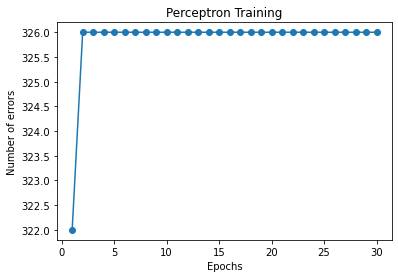

Test Accuracy: 0.0
Confusion Matrix:
 [[ 0  0  0]
 [69  0  0]
 [72  0  0]]


In [22]:
# Plot the number of errors per epoch
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.title('Perceptron Training')
plt.show()

# Test the model
y_pred = ppn.predict(X_test_std)

# Compute the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print('Test Accuracy:', accuracy)

# Create a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

There are around 470 datapoints and as we can see in the above plot, on average, 330 of our predictions using the Perceptron Model are wrong, suggesting that our data is not linearly separable and as a result it is extremely hard to binary classify our data using the perceptron model.

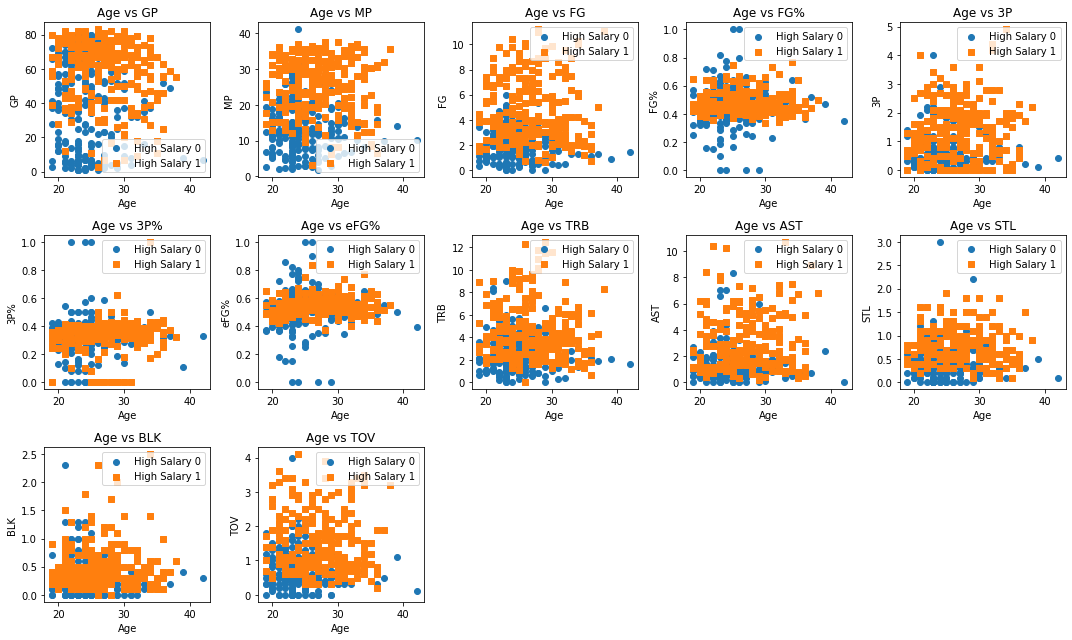

In [23]:
import matplotlib.pyplot as plt

columns_to_plot = ["GP", "MP", "FG", "FG%", "3P", "3P%", "eFG%", "TRB", "AST", "STL", "BLK", "TOV"]
n_plots = len(columns_to_plot)
n_cols = 5  # Number of columns in subplot grid
n_rows = (n_plots + n_cols - 1) // n_cols  # Calculate rows needed

# Adjust figsize by reducing the size of each subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 3*n_rows))  # Reduced from 5 to 3 inches per subplot
axes = axes.flatten()

# Create a plot for each feature against 'Age'
for i, feature in enumerate(columns_to_plot):
    ax = axes[i]
    for high_salary in [0, 1]:
        subset = df[df['high_salary'] == high_salary]
        shape = 'o' if high_salary == 0 else 's'  # Circle if high_salary is 0, square if 1
        ax.scatter(subset['Age'], subset[feature], marker=shape, label=f'High Salary {high_salary}')
    ax.set_xlabel('Age')
    ax.set_ylabel(feature)
    ax.legend()
    ax.set_title(f'Age vs {feature}')

# Hide any unused axes if there are any
for ax in axes[n_plots:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

This result makes sense as when we look at our data and plot Age with each of our other predictors, we can see that our data is not linearly separable and as a result the single perceptron model would not be a very good fit. 